# House Prices: Advanced Regression Techniques, Part 2
----

## PCA, KMeans Clustering, and K Nearest Neighbors

In [17]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from IPython.display import display

%matplotlib inline 
pd.options.display.precision = 4
mpl.rcParams['font.family'] = 'Lato'
mpl.rcParams['font.weight'] = 700
sns.set(font='Lato', font_scale=1)
sns.set()
np.random.seed(42)

## Load the data from your `pickled` DataFrames

In [18]:
# Your code here:

features = pd.read_pickle('features.pickle')
target = pd.read_pickle('target.pickle')

## Use `LabelEncoder/OneHotEncoder` or `pd.get_dummies` to encode categorical variables

In [19]:
# Your code here:
# already encoded in part 1, don't need to do again
features.describe()

,bedroomabvgr_0,bedroomabvgr_1,bedroomabvgr_2,bedroomabvgr_3,bedroomabvgr_4,bedroomabvgr_5,bedroomabvgr_6,bldgtype_1Fam,bldgtype_2fmCon,bldgtype_Duplex,...,lotfrontage,lowqualfinsf,masvnrarea,miscval,openporchsf,screenporch,secondflrsf,threessnporch,totalbsmtsf,wooddecksf
count,1095.0000,1095.0000,1095.0000,1095.0000,1095.0000,1095.0000,1095.0000,1095.0000,1095.0000,1095.0000,...,1095.0000,1095.0000,1095.0000,1095.0000,1095.0000,1095.0000,1095.0000,1095.0000,1095.0000,1095.0000
mean,0.0046,0.0338,0.2420,0.5571,0.1443,0.0137,0.0046,0.8384,0.0210,0.0365,...,4.2230,0.1118,2.1126,0.2184,2.4120,0.3834,2.8365,0.0997,6.7719,2.5473
std,0.0675,0.1808,0.4285,0.4970,0.3515,0.1163,0.0675,0.3683,0.1435,0.1877,...,0.3106,0.7882,2.6117,1.1780,2.1467,1.3610,3.2934,0.7180,1.0943,2.6028
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,3.0910,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,...,4.1109,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.6908,0.0000
50%,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,...,4.2678,0.0000,0.0000,0.0000,3.3673,0.0000,0.0000,0.0000,6.9167,0.0000
75%,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,...,4.3694,0.0000,5.0907,0.0000,4.2905,0.0000,6.5924,0.0000,7.1550,5.1358
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,5.7494,6.3509,6.9546,9.0241,6.2206,6.0186,7.6334,6.2324,8.7178,6.7546


## Scale your data.

In [20]:
# Your code here:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

## Use the first two `PCA` components to visualize your data.

* Use your **target** as your color parameter.

In [21]:
# Your code here:
from sklearn.decomposition import PCA
pca = PCA()
features_scaled_pca = pca.fit_transform(features_scaled)

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


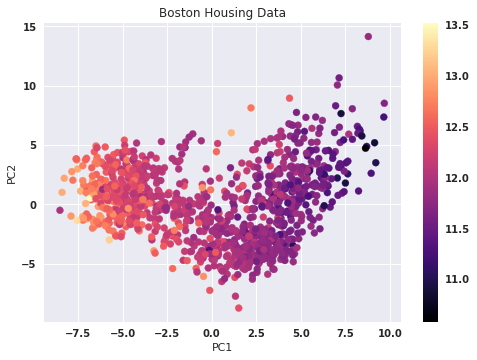

In [22]:
plt.scatter(features_scaled_pca[:,0], features_scaled_pca[:,1], c=target, cmap='magma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.title('Boston Housing Data')

## Create a scree plot by plotting the explained variance and cumulative explained variance against component number.

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


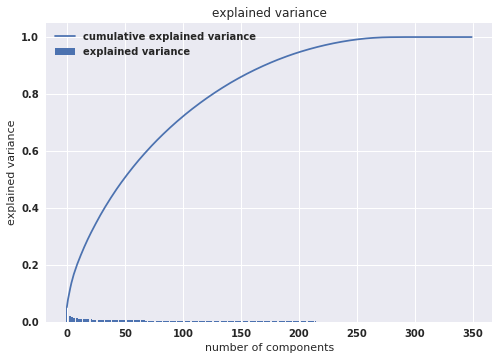

In [23]:
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, label = 'explained variance')
plt.plot(np.cumsum(pca.explained_variance_ratio_), label = 'cumulative explained variance')
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.title('explained variance')
plt.legend()
plt.show()

Too many components to display both together

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


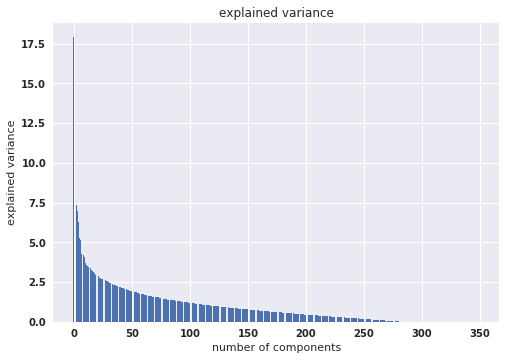

In [24]:
plt.bar(range(len(pca.explained_variance_)), pca.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.title('explained variance')

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


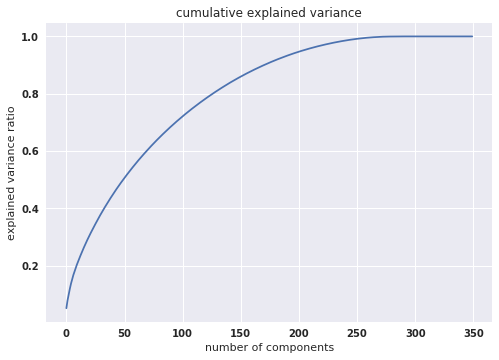

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')
plt.title('cumulative explained variance')

## How many components do you need to explain 90% of your variance?

In [26]:
np.where(np.cumsum(pca.explained_variance_ratio_) > .9)[0][0]

170

## Use KMeans to cluster your data. Evaluate different values of K visually and with the silhouette score. Justify your choice.

In [27]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

In [29]:
# Your code here:
km = KMeans(n_clusters=3)
km.fit(features_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
sample_silhouette_values = silhouette_samples(features_scaled, km.labels_)
for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
    ith_cluster_silhouette_values.sort()
    print('silhouette score for cluster {}:'.format(i), ith_cluster_silhouette_values.mean())

silhouette score for cluster 0: -0.0362287157828
silhouette score for cluster 1: 0.157581979458
silhouette score for cluster 2: -0.0967716450666


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


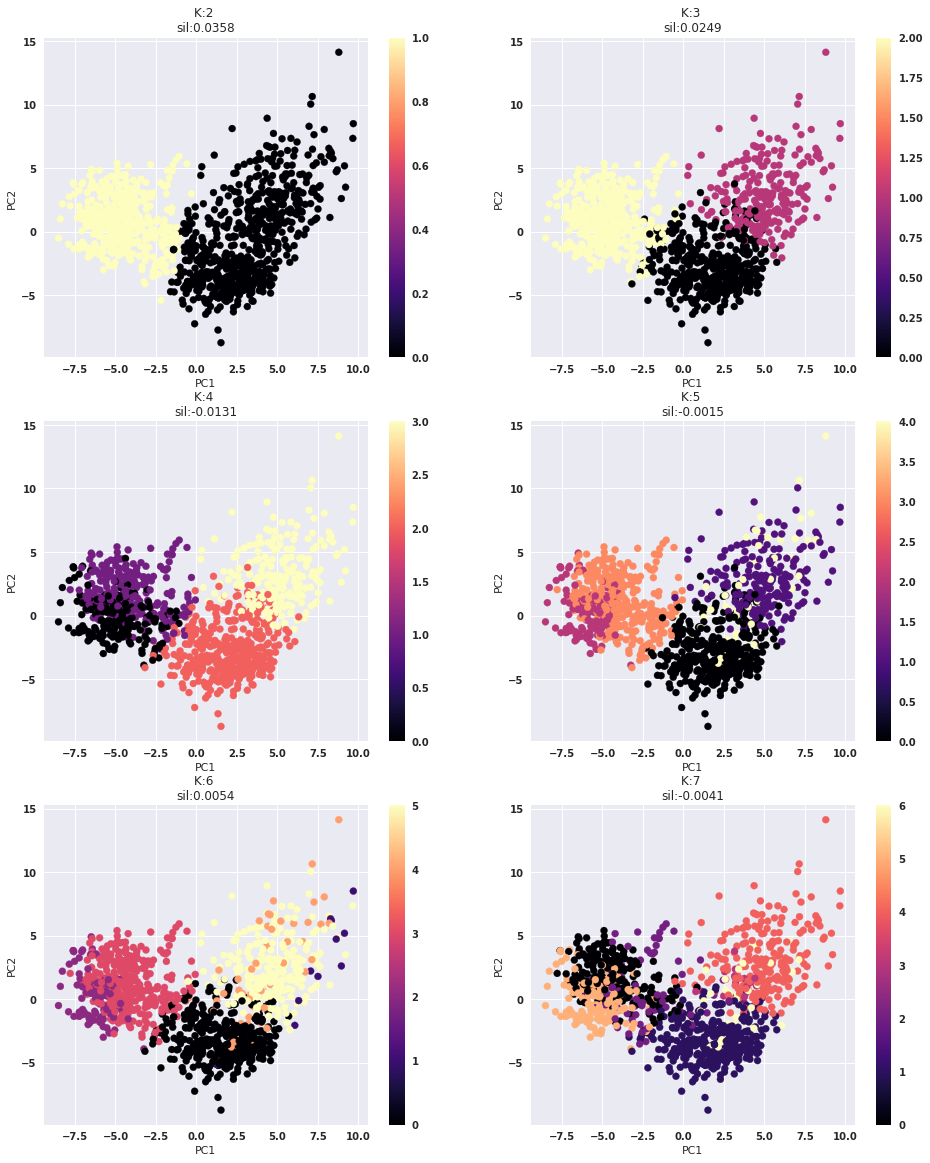

In [31]:
ks = []
sils = []
plt.figure(figsize=(16,20))
for i,k  in enumerate(range(2,8)):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(features_scaled)
    plt.subplot(321+i)
    plt.scatter(features_scaled_pca[:,0], features_scaled_pca[:,1], c=km.labels_, cmap='magma')
    plt.title('K:{} \nsil:{}'.format(k, round(silhouette_score(features_scaled, km.labels_),4)))
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.colorbar()
    ks.append(k)
    sils.append(silhouette_score(features_scaled, km.labels_))

## Repeat the step above, except use `silhouette_samples` to make the color of each point its silhouette score. Which clusters are the best defined? Are there any that are more poorly defined?

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


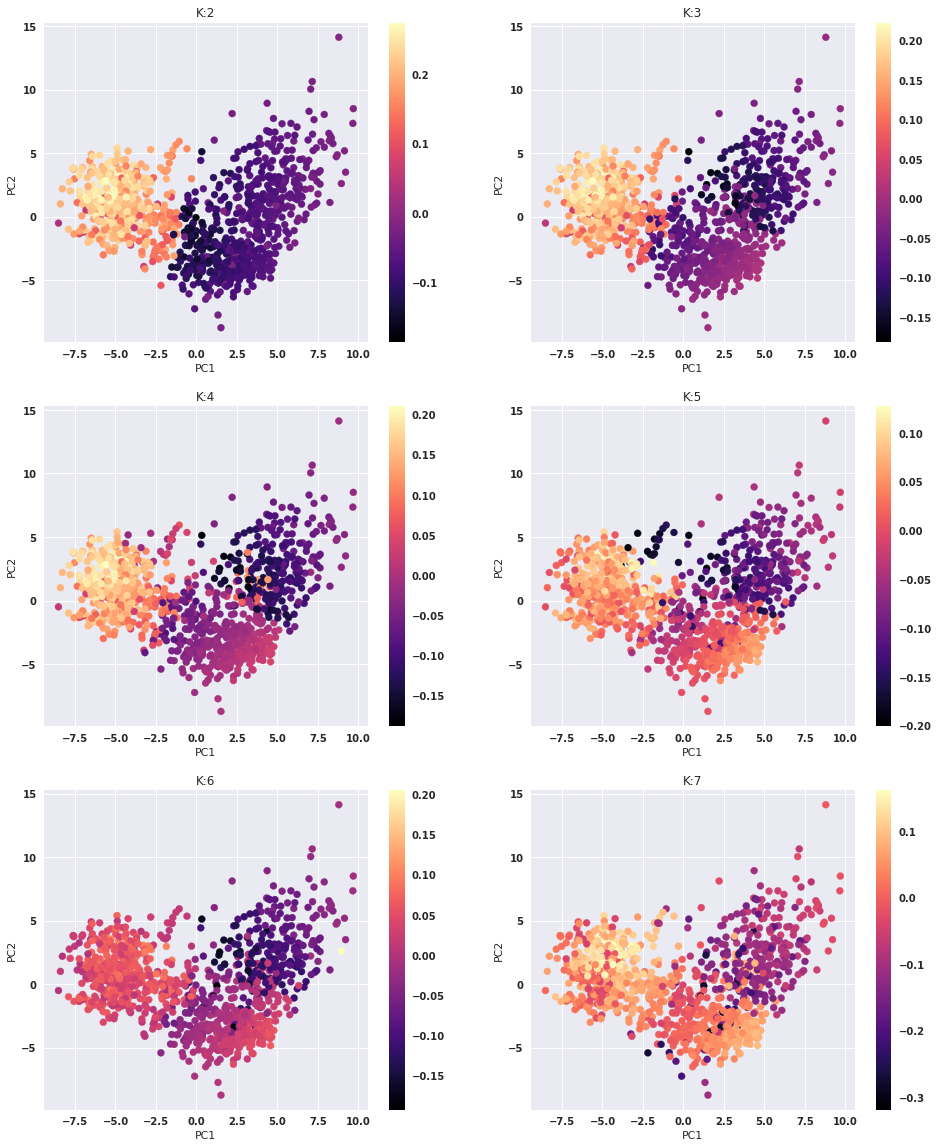

In [34]:
# Your code here:
ks = []
sils = []
plt.figure(figsize=(16,20))
for i,k  in enumerate(range(2,8)):
    km = KMeans(n_clusters=k)
    km.fit(features_scaled)
    plt.subplot(321+i)
    plt.scatter(features_scaled_pca[:,0], features_scaled_pca[:,1], c=silhouette_samples(features_scaled, km.labels_), cmap='magma')
    plt.title('K:{}'.format(k))
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.colorbar()
    ks.append(k)
    sils.append(silhouette_score(features_scaled, km.labels_))

### Cluster 2 (on the left, with lighter colors) is the best defined cluster, while 0 and 1 are not as well-defined.

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


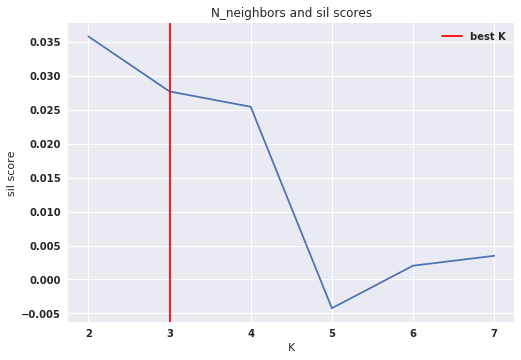

In [37]:
plt.plot(ks, sils)
plt.title('N_neighbors and sil scores')
plt.xlabel('K')
plt.ylabel('sil score')
plt.axvline(3, c='r', label='best K')
plt.legend()

## Create a temporary target, `km_target`, from the `KMeans.labels_` from your KMeans clustering.

In [39]:
km=KMeans(n_clusters=3)
km.fit(features_scaled)
km.transform(features_scaled)
km_target = km.labels_

In [40]:
km_target.shape

(1095,)

In [41]:
features_scaled.shape

(1095, 350)

## Use `KNeighborsClassifier` to build a model predicting your `km_target`. 

* Train test split your data
* Use GridSearchCV to cross-validate and find a good `n_neighbors` parameter.
* Evaluate your model performance using the `.score()` method, which returns accuracy.

In [42]:
# Your code here:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, km_target, test_size=0.3, random_state=42)

In [44]:
params = {
    'n_neighbors':list(range(1,21,2))
}

In [45]:
gsknc = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=5)

In [46]:
gsknc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

## Plot your train and test scores from your `GridSearchCV.cv_results_` object over different values of k. Did this method yield a good value for k? 

In [47]:
gsknc.score(X_train, y_train)

0.94647519582245432

In [48]:
gsknc.score(X_test, y_test)

0.88449848024316113

In [49]:
gsknc.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


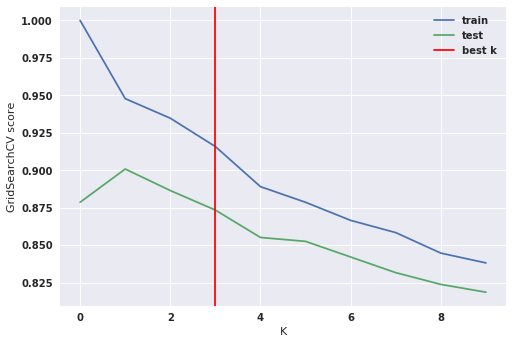

In [51]:
# Your code here:

plt.plot(gsknc.cv_results_['mean_train_score'], label='train')
plt.plot(gsknc.cv_results_['mean_test_score'], label='test')
plt.xlabel('K')
plt.ylabel('GridSearchCV score')
plt.axvline(x=3, c='r', label = 'best k')
plt.legend()

## Evaluate your model. Does it have high bias? High variance? How does GridSearchCV help reduce bias and variance?

### It does not have high bias or high variance because it predicts well for both the train and test set, and the scores for each are similar. GridSearchCV helps to find the best parameters for the model.



## Use the `pickle` library to pickle your fit `scaler`, `pca`, and `KNeighborsClassifier` objects. 

In [52]:
# Your code here:
import pickle 
pickle.dump(scaler, open("scaler.p", "wb"))
pickle.dump(pca, open('pca.p', 'wb'))
pickle.dump(gsknc, open('gsknc.p', 'wb'))